In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE, RFECV, SelectKBest ,chi2
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('bank-marketing.csv')
dataset.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
dataset.isna().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


# Describe Data

### 1. Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [5]:
dataset.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Here the pdays values are positively skewed the values of pdays are as follows:
min = -1.000000
mean = 40.197828
median = -1
max = 871.000000. The standard deviation is greater than mean along with mean and median values are also very different, that means it's highly dispersed.

### 2. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [6]:
print('Pdays Mean: ', dataset['pdays'].mean())
print('Pdays Median: ', dataset['pdays'].median())

Pdays Mean:  40.19782796222158
Pdays Median:  -1.0


From above values it seems the data is highly spreaded

### 3. Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

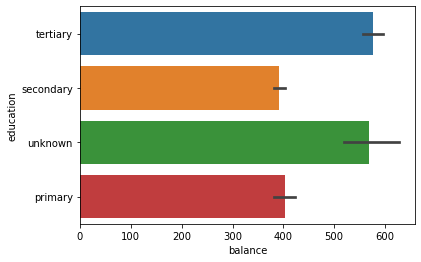

In [7]:
from numpy import median
sns.barplot(x="balance", y="education", data=dataset, estimator=median)

From above graph, we can see that tertiary education has highest median for balance

### 4. Make a box plot for pdays. Do you see any outliers?

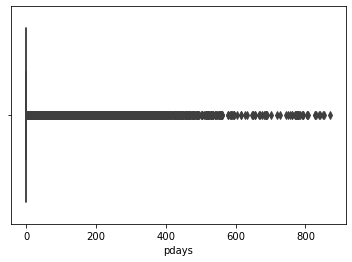

In [8]:
sns.boxplot(x=dataset['pdays'])

Yes, there are values so much far from the mean, which are nothing but the outliers. So let's remove the values more than 500

In [9]:
dataset[dataset['pdays'] > 300].count()

age          2470
job          2470
salary       2470
marital      2470
education    2470
targeted     2470
default      2470
balance      2470
housing      2470
loan         2470
contact      2470
day          2470
month        2470
duration     2470
campaign     2470
pdays        2470
previous     2470
poutcome     2470
response     2470
dtype: int64

In [10]:
dataset.drop(dataset[dataset['pdays'] > 300].index, inplace=True)

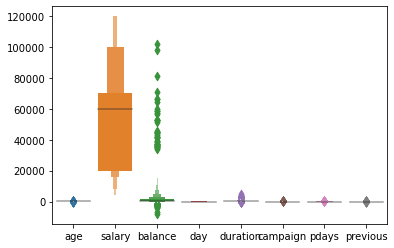

In [11]:
sns.boxenplot(data=dataset)

In [12]:
dataset[dataset['balance'] > 20000].count()

age          184
job          184
salary       184
marital      184
education    184
targeted     184
default      184
balance      184
housing      184
loan         184
contact      184
day          184
month        184
duration     184
campaign     184
pdays        184
previous     184
poutcome     184
response     184
dtype: int64

In [13]:
dataset.drop(dataset[dataset['balance'] > 20000].index, inplace=True)

### Let's convert the output value to number to perform bivariate analysis

In [14]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
dataset_new = dataset.copy()
dataset_new['response'] = l.fit_transform(dataset_new['response'])

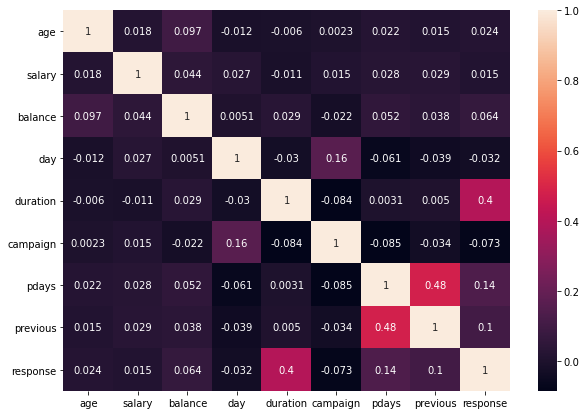

In [15]:
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(dataset_new.corr(), annot=True)

day and campaign features are negatively correlated with response, where as duration is highly correlated. Drop the column with negative correlation

### Are the features about the previous campaign data useful?

No, because it is negatively correlated with the target variable. So need to remove it.

In [16]:
dataset_new.drop(columns='campaign', inplace=True)
dataset_new.drop(columns='day', inplace=True)

In [17]:
dataset_new.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,month,duration,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,may,261,-1,0,unknown,0
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,may,151,-1,0,unknown,0
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,may,76,-1,0,unknown,0
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,may,92,-1,0,unknown,0
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,may,198,-1,0,unknown,0


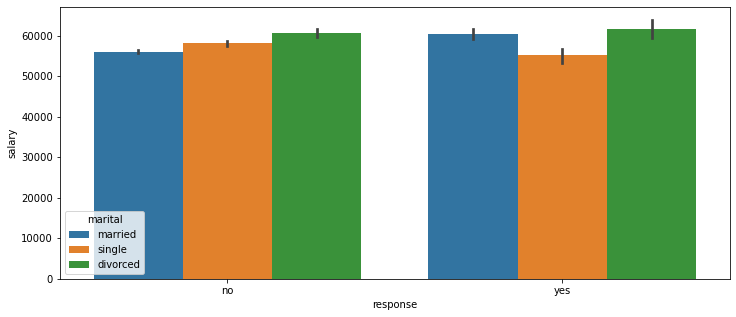

In [18]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(dataset['response'],dataset['salary'], dataset['marital']);

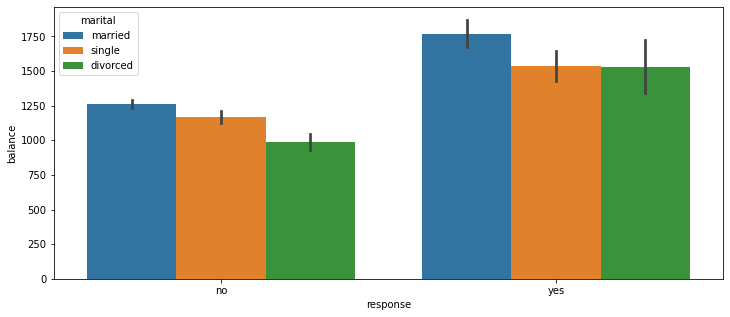

In [19]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(dataset['response'],dataset['balance'], dataset['marital']);

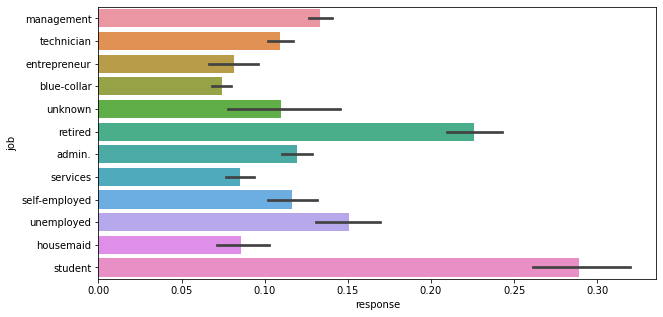

In [20]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(dataset_new['response'],dataset_new['job']);

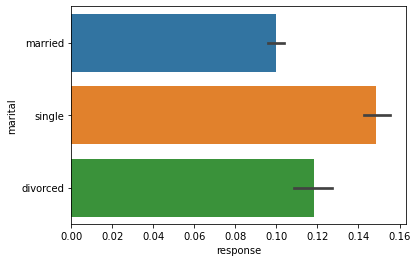

In [21]:
sns.barplot(dataset_new['response'],dataset_new['marital']);

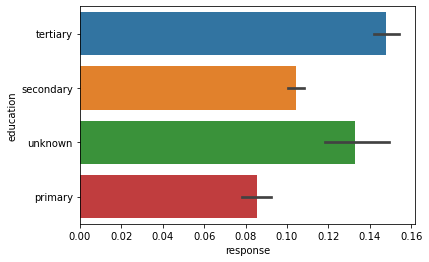

In [22]:
sns.barplot(dataset_new['response'],dataset_new['education']);

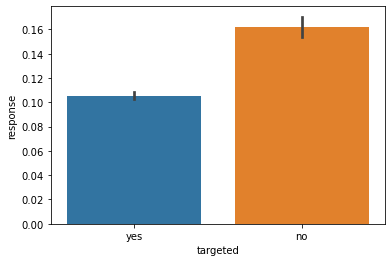

In [23]:
sns.barplot(dataset_new['targeted'], dataset_new['response']);

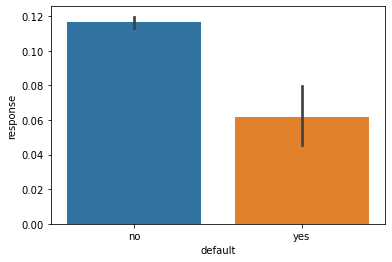

In [24]:
sns.barplot(dataset_new['default'], dataset_new['response']);

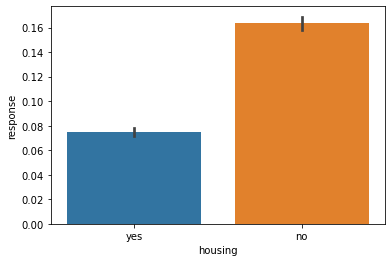

In [25]:
sns.barplot(dataset_new['housing'], dataset_new['response']);

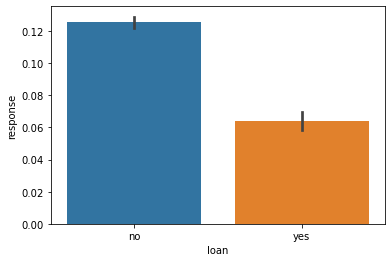

In [26]:
sns.barplot(dataset_new['loan'], dataset_new['response']);

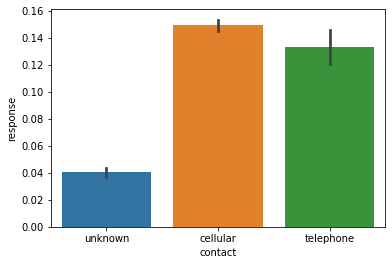

In [27]:
sns.barplot(dataset_new['contact'], dataset_new['response']);

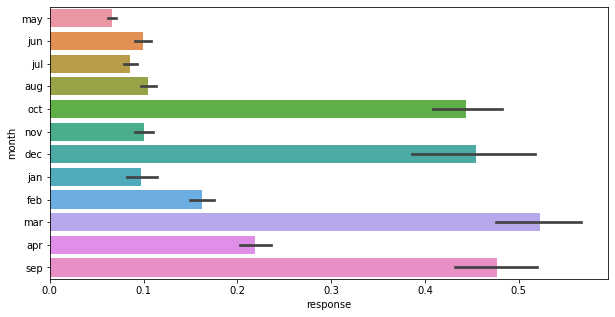

In [28]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(dataset_new['response'], dataset_new['month']);

### Are pdays and poutcome associated with the target?

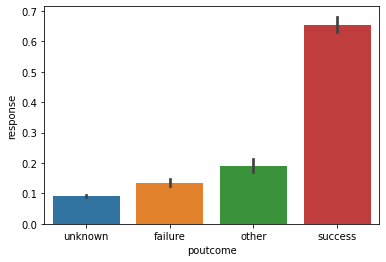

In [29]:
sns.barplot(dataset_new['poutcome'], dataset_new['response']);

Yes, as we have seen pdays have positive correlation with the target variable and poutcome is highly effective in plotting the relation with target variable. So both are important for our analysis.

### Let's create age group

In [30]:
def age_group(x):
    if x > 0 and x <=20:
        return '0-20'
    if x > 20 and x <=30:
        return '21-30'
    if x > 30 and x <=60:
        return '31-60'
    if x > 60:
        return 'above 60'

In [31]:
dataset_new['age_group'] = dataset_new['age'].apply(age_group)

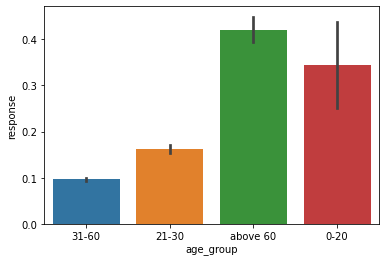

In [32]:
sns.barplot(dataset_new['age_group'], dataset_new['response'])

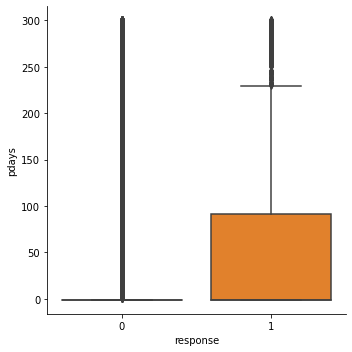

In [33]:
sns.catplot(x="response", y="pdays", data=dataset_new, kind="box")

Let's create a pairplot for overall view

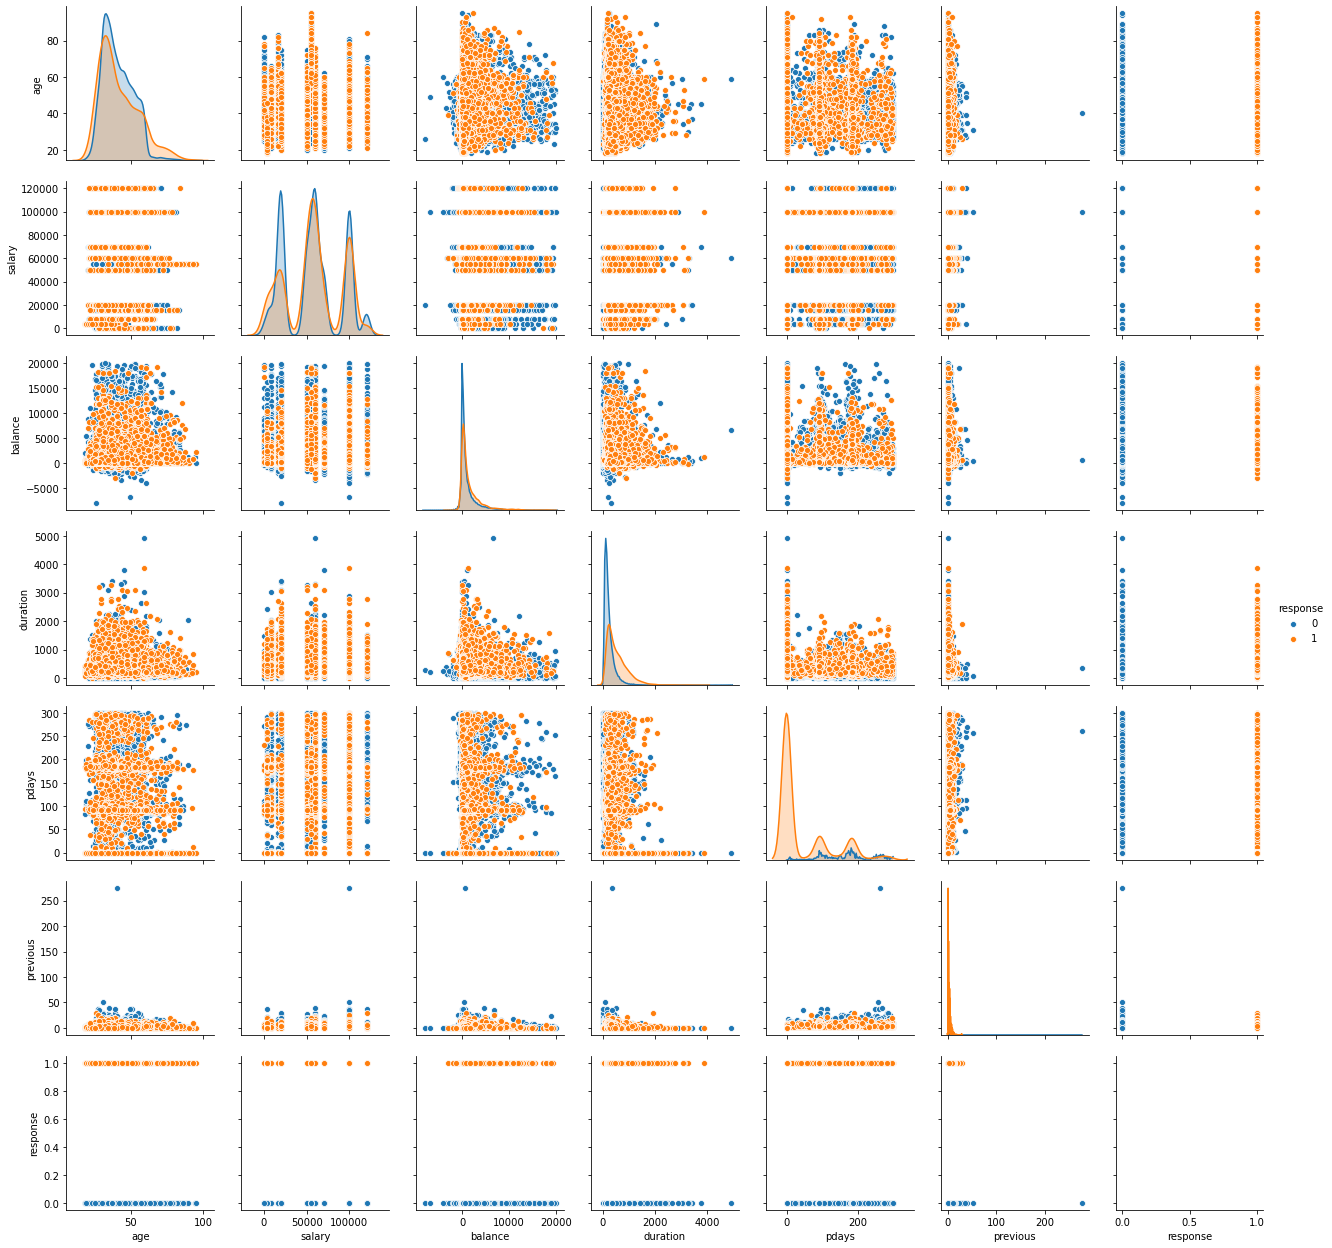

In [34]:
sns.pairplot(dataset_new, hue='response')

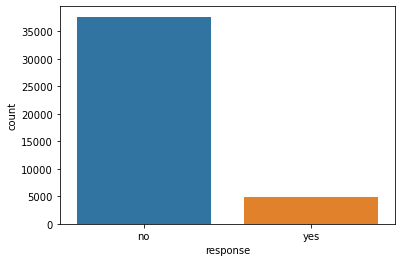

In [35]:
sns.countplot(dataset['response'])

Lets's select same number of samples for both the response, in order to mitigate overfitting.

In [36]:
dataset_new['response'].value_counts()

0    37638
1     4919
Name: response, dtype: int64

In [37]:
response_no = dataset_new[dataset_new['response'] == 0]
response_no = response_no.iloc[:4919, :]
response_yes = dataset_new[dataset_new['response'] == 1]
stratified_dataset = pd.concat([response_yes, response_no])
stratified_dataset = stratified_dataset.sample(frac=1)

In [38]:
dataset_new = stratified_dataset

In [39]:
dataset_new[dataset_new['pdays'] < 0]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,month,duration,pdays,previous,poutcome,response,age_group
1174,36,technician,60000,married,secondary,yes,no,83,yes,no,unknown,may,178,-1,0,unknown,0,31-60
4014,53,technician,60000,divorced,secondary,yes,no,751,yes,no,unknown,may,343,-1,0,unknown,0,31-60
5938,28,admin.,50000,single,secondary,yes,no,460,yes,no,unknown,may,741,-1,0,unknown,1,21-30
1797,29,admin.,50000,single,secondary,yes,no,-53,yes,no,unknown,may,108,-1,0,unknown,0,21-30
39521,32,technician,60000,single,tertiary,no,no,654,yes,no,cellular,may,615,-1,0,unknown,1,31-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40543,46,blue-collar,20000,married,secondary,yes,no,922,yes,no,telephone,jul,576,-1,0,unknown,1,31-60
31119,68,retired,55000,married,secondary,yes,no,445,no,no,cellular,feb,475,-1,0,unknown,1,above 60
41949,78,retired,55000,divorced,primary,yes,no,229,no,no,telephone,oct,97,-1,0,unknown,1,above 60
4786,32,blue-collar,20000,married,primary,yes,no,-457,yes,yes,unknown,may,288,-1,0,unknown,0,31-60


Let's convert pdays -1 to 0

In [40]:
def convertpdays(x):
    if x == -1:
        return 0
    else:
        return x

In [41]:
dataset_new['pdays'] = dataset_new['pdays'].apply(convertpdays)

### Encode Categorical Variables

In [42]:
#Label encoding
dataset_new['targeted'] = l.fit_transform(dataset_new['targeted'])
dataset_new['default'] = l.fit_transform(dataset_new['default'])
dataset_new['housing'] = l.fit_transform(dataset_new['housing'])
dataset_new['loan'] = l.fit_transform(dataset_new['loan'])

In [43]:
#Onehot encoding
dataset_new = pd.get_dummies(dataset_new)

In [44]:
dataset_new.head()

,age,salary,targeted,default,balance,housing,loan,duration,pdays,previous,...,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age_group_0-20,age_group_21-30,age_group_31-60,age_group_above 60
1174,36,60000,1,0,83,1,0,178,0,0,...,0,0,0,0,0,1,0,0,1,0
4014,53,60000,1,0,751,1,0,343,0,0,...,0,0,0,0,0,1,0,0,1,0
5938,28,50000,1,0,460,1,0,741,0,0,...,0,0,0,0,0,1,0,1,0,0
1797,29,50000,1,0,-53,1,0,108,0,0,...,0,0,0,0,0,1,0,1,0,0
39521,32,60000,0,0,654,1,0,615,0,0,...,0,0,0,0,0,1,0,0,1,0


Now let's divide the predict variable and target variable

In [45]:
X = dataset_new
y = dataset_new['response']

In [46]:
#Delete the response column from X
X.drop(columns=['response'], inplace=True)
print(X.columns)

Index(['age', 'salary', 'targeted', 'default', 'balance', 'housing', 'loan',
       'duration', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age_group_0-20', 'age_group_21-30',
       'age_group_31-60', 'age_group_above 60'],
      dtype='object')


In [47]:
#Convert to numpy array 
# X = X.values

### Split into train and test set

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

### Scale the variables

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)

### Fit and predict

In [51]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

### Check Accuracy and classification report

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[982  11]
 [ 38 937]]


0.9751016260162602

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       993
           1       0.99      0.96      0.97       975

    accuracy                           0.98      1968
   macro avg       0.98      0.97      0.98      1968
weighted avg       0.98      0.98      0.98      1968



Here from the classification report we can see the precision, recall and f1-score is lesser than 0 as it was very poorly classified. It is because of less training data for the target 1, which was plotted before in the graph

## RFE Feature Selection

In [54]:
rfe = RFE(estimator=classifier, step=1)
rfe = rfe.fit(X_train, y_train)

### Feature Importance

In [55]:
selected_rfe_features = pd.DataFrame({'Features': list(X.columns), 'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Features,Ranking
0,age,1
26,education_secondary,1
29,contact_cellular,1
30,contact_telephone,1
31,contact_unknown,1
32,month_apr,1
33,month_aug,1
35,month_feb,1
36,month_jan,1
23,marital_married,1


In [56]:
rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=0, solver='warn',
                                   tol=0.0001, verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [57]:
print('Optimal number of features: ', rfecv.n_features_)
print('Best features: ', X.columns[rfecv.support_])

Optimal number of features:  8
Best features:  Index(['duration', 'marital_married', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_jun', 'month_may', 'poutcome_unknown'],
      dtype='object')


In [58]:
rfecv.grid_scores_

array([0.94612363, 0.97331631, 0.97522163, 0.97522163, 0.97522163,
       0.9756025 , 0.9756025 , 0.97585671, 0.97572965, 0.97585671,
       0.97572957, 0.97572957, 0.97572957, 0.97560267, 0.97560267,
       0.97547568, 0.9754756 , 0.9754756 , 0.9754756 , 0.97572981,
       0.97560283, 0.9754756 , 0.97534854, 0.97509441, 0.97496718,
       0.97496718, 0.97471305, 0.97471305, 0.9745859 , 0.97509433,
       0.97496718, 0.97496726, 0.9748402 , 0.9748402 , 0.9748402 ,
       0.97496734, 0.97496734, 0.97496734, 0.97496726, 0.97496726,
       0.97496726, 0.97496726, 0.97484028, 0.97496734, 0.9748402 ,
       0.9748402 , 0.9748402 , 0.9748402 , 0.97496726, 0.9748402 ,
       0.9748402 , 0.97496726])

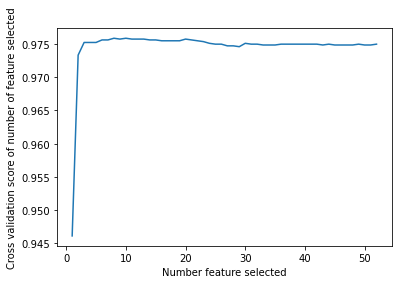

In [59]:
plt.figure()
plt.xlabel('Number feature selected')
plt.ylabel('Cross validation score of number of feature selected')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [60]:
selector = RFE(classifier, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)

In [61]:
y_pred = selector.predict(X_test)

In [62]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[985   8]
 [ 37 938]]


0.9771341463414634

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       993
           1       0.99      0.96      0.98       975

    accuracy                           0.98      1968
   macro avg       0.98      0.98      0.98      1968
weighted avg       0.98      0.98      0.98      1968



Still only with 3 features, we are getting good classification result

### K Folds Logistic Regression 

In [64]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.45 %
Standard Deviation: 0.59 %


### What is the precision, recall, accuracy of your model?

In [65]:
print("Precision: {:.2f} %".format(precision_score(y_test, y_pred)*100))
print("Recall: {:.2f} %".format(recall_score(y_test, y_pred)*100))
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

Precision: 99.15 %
Recall: 96.21 %
Accuracy: 97.71 %


## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)

In [67]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [68]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[987   6]
 [ 32 943]]


0.9806910569105691

### What is the precision, recall, accuracy of your model?

In [69]:
print("Precision: {:.2f} %".format(precision_score(y_test, y_pred)*100))
print("Recall: {:.2f} %".format(recall_score(y_test, y_pred)*100))
print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))

Precision: 99.37 %
Recall: 96.72 %
Accuracy: 98.07 %


### K Folds Random Forest Classification 

In [70]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.53 %
Standard Deviation: 0.59 %


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       993
           1       0.99      0.97      0.98       975

    accuracy                           0.98      1968
   macro avg       0.98      0.98      0.98      1968
weighted avg       0.98      0.98      0.98      1968



### Random Forest Feature Importance

In [72]:
# check Important features
feature_importances_df = pd.DataFrame({"feature": list(X.columns),
                                       "importance": classifier.feature_importances_}).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
40,month_may,0.295062
31,contact_unknown,0.201945
7,duration,0.130514
29,contact_cellular,0.103695
5,housing,0.044045
47,poutcome_unknown,0.039157
8,pdays,0.034169
9,previous,0.026233
0,age,0.023394
4,balance,0.018928


Here, the Logistic Regression classifier and Random Forest both are performing good. As both have very good accuracy and F1-score

Feature importance we got using RFE and Random Forest seems to be different.

In [74]:
import tensorflow as tf

In [75]:
N, D = X_train.shape

7870

In [91]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D, )),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

#Train the model
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

#Evaluate the model - evaluate() returns the loss and accuracy
print('Train score:', model.evaluate(X_train, y_train))
print('Test score:', model.evaluate(X_test, y_test))

Train on 7870 samples, validate on 1968 samples
Epoch 1/100
7870/7870 [==============================] - 1s 152us/sample - loss: 0.4881 - accuracy: 0.7734 - val_loss: 0.3298 - val_accuracy: 0.8948
Epoch 2/100
7870/7870 [==============================] - 1s 76us/sample - loss: 0.2507 - accuracy: 0.9283 - val_loss: 0.2110 - val_accuracy: 0.9385
Epoch 3/100
7870/7870 [==============================] - 1s 77us/sample - loss: 0.1814 - accuracy: 0.9480 - val_loss: 0.1637 - val_accuracy: 0.9517
Epoch 4/100
7870/7870 [==============================] - 1s 103us/sample - loss: 0.1491 - accuracy: 0.9604 - val_loss: 0.1385 - val_accuracy: 0.9649
Epoch 5/100
7870/7870 [==============================] - 1s 70us/sample - loss: 0.1296 - accuracy: 0.9657 - val_loss: 0.1219 - val_accuracy: 0.9690
Epoch 6/100
7870/7870 [==============================] - 1s 99us/sample - loss: 0.1163 - accuracy: 0.9701 - val_loss: 0.1102 - val_accuracy: 0.9746
Epoch 7/100
7870/7870 [==============================] - 1s 75

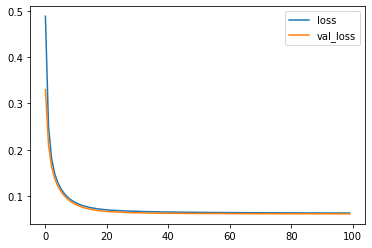

In [92]:
#plot whats returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

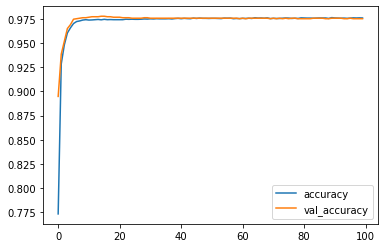

In [93]:
# plot the accuracy too
#plot whats returned by model.fit()
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [94]:
y_pred = model.predict(X_test)
import numpy as np
y_pred = np.round(y_pred).flatten()
print(y_pred)

[1. 1. 0. ... 0. 1. 0.]


In [95]:
accuracy_score(y_pred, y_test)

0.9751016260162602